<a href="https://colab.research.google.com/github/Yathang007/Neural-Network-Implementation-from-Scratch/blob/main/MDM_DL_Asg1_PartB_ANNipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ANN using sklearn

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


ANN Model Results:
Accuracy: 0.89
Confusion Matrix:
[[1174    0   23   40    6    1  138    0   12    0]
 [   2 1382    0    8    3    1    4    0    2    0]
 [  27    1 1104   21  131    1  117    1    4    0]
 [  21   16    8 1282   59    0   52    0   11    0]
 [   4    4   92   31 1136    0   85    0    5    0]
 [   2    0    1    0    0 1395    1   21    7   22]
 [ 181    5   76   33   93    0 1014    0    5    0]
 [   0    0    0    0    0   31    0 1288    3   37]
 [   6    1    2    1    3    8   11    3 1303    4]
 [   0    0    0    0    0   14    0   44    3 1373]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1394
           1       0.98      0.99      0.98      1402
           2       0.85      0.78      0.81      1407
           3       0.91      0.88      0.89      1449
           4       0.79      0.84      0.81      1357
           5       0.96      0.96      0.96      1449
           6   

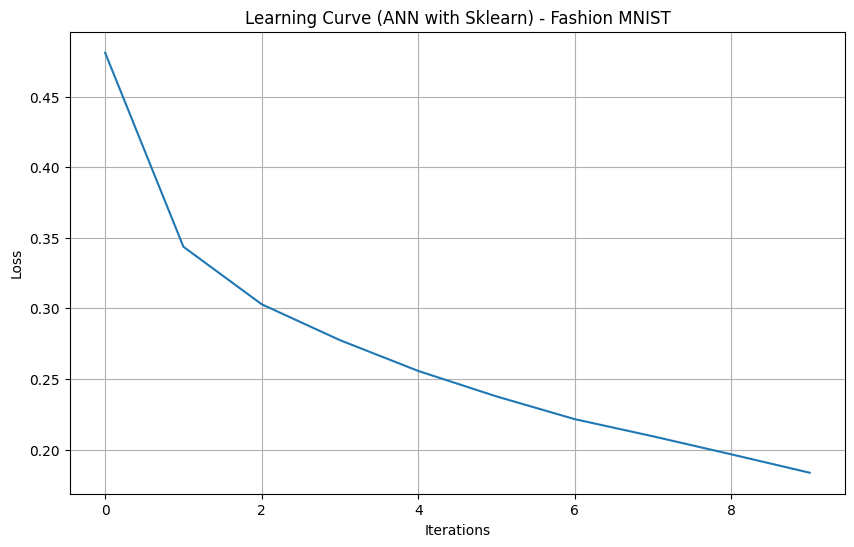

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

# Load Fashion-MNIST data from OpenML
fashion_mnist = fetch_openml('Fashion-MNIST')

# Features and target
X = fashion_mnist.data
y = fashion_mnist.target.astype(int)  # Convert labels to integers

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (standard scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the ANN model using MLPClassifier
ann_model = MLPClassifier(hidden_layer_sizes=(128,), max_iter=10, activation='relu', solver='adam', random_state=42)

# Train the model
ann_model.fit(X_train, y_train)

# Make predictions
y_pred = ann_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("ANN Model Results:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

# Plotting the learning curve (loss curve)
plt.figure(figsize=(10, 6))
plt.plot(ann_model.loss_curve_)
plt.title('Learning Curve (ANN with Sklearn) - Fashion MNIST')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Decision Boundaries (using PCA for dimensionality reduction)
# Reduce the features to 2D for visualization using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Split the reduced data into training and test sets
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train the ANN model on the reduced dataset
ann_model.fit(X_train_reduced, y_train)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict class for each point in the mesh grid
Z = ann_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap="coolwarm")
plt.title('Decision Boundaries for ANN (PCA reduced Fashion MNIST data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## ANN using Keras

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7473 - loss: 0.7408 - val_accuracy: 0.8461 - val_loss: 0.4390
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8569 - loss: 0.3998 - val_accuracy: 0.8582 - val_loss: 0.3922
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8743 - loss: 0.3503 - val_accuracy: 0.8583 - val_loss: 0.3937
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8785 - loss: 0.3329 - val_accuracy: 0.8706 - val_loss: 0.3634
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8895 - loss: 0.3028 - val_accuracy: 0.8654 - val_loss: 0.3661
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8924 - loss: 0.2929 - val_accuracy: 0.8767 - val_loss: 0.3490
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6

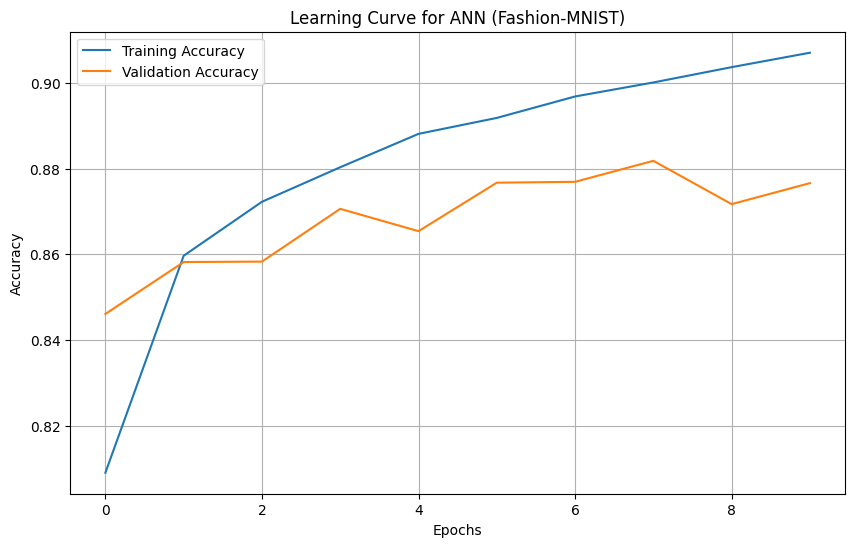

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


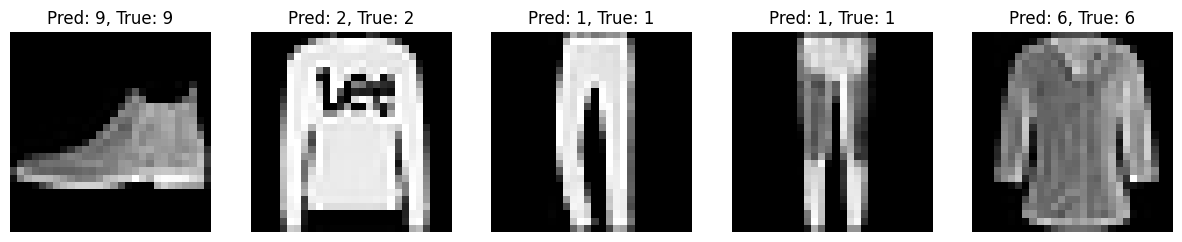

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

# Load Fashion-MNIST dataset (train and test sets)
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

# Preprocess the data
X_train = X_train.reshape((X_train.shape[0], 28*28))  # Flatten the images
X_test = X_test.reshape((X_test.shape[0], 28*28))  # Flatten the images

# Normalize the data to range between 0 and 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the ANN model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28*28,)))  # Input layer (flattened image)
model.add(layers.Dense(64, activation='relu'))  # Hidden layer
model.add(layers.Dense(10, activation='softmax'))  # Output layer (10 classes)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve for ANN (Fashion-MNIST)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot some sample images with predicted labels
predictions = model.predict(X_test)

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    ax = axes[i]
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {np.argmax(predictions[i])}, True: {np.argmax(y_test[i])}")
    ax.axis('off')
plt.show()


## ANN from Scratch

Epoch 1/9, Loss: 1.0522
Epoch 2/9, Loss: 0.7236
Epoch 3/9, Loss: 0.7239
Epoch 4/9, Loss: 0.6324
Epoch 5/9, Loss: 0.6638
Epoch 6/9, Loss: 0.4790
Epoch 7/9, Loss: 0.5166
Epoch 8/9, Loss: 0.5219
Epoch 9/9, Loss: 0.5416
Model Results:
Accuracy: 0.83
Confusion Matrix:
[[ 940   17   22   88    5    1  119    0   10    0]
 [   2 1157   16   37    3    0    3    0    1    0]
 [  15    1  859    7  176    1  138    0    8    0]
 [  42   19   11 1012   49    0   46    0    5    0]
 [   1    1   82   42  930    0  138    0    7    1]
 [   0    0    0    1    0 1088    0   61    4   57]
 [ 169    3  138   49  141    0  699    0   19    0]
 [   0    0    0    0    0   42    0 1038    1   78]
 [   2    1    8   13    9    5   47    9 1103    0]
 [   0    0    0    0    0   15    1   57    1 1129]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1202
           1       0.96      0.95      0.96      1219
           2       

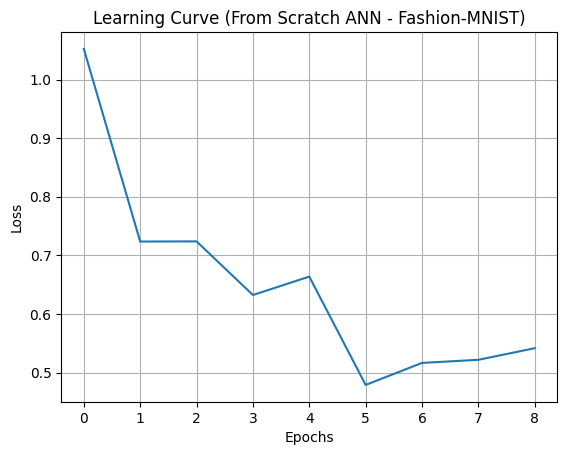

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion-MNIST dataset (train and test sets)
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28*28) / 255.0  # Flatten and normalize
X_test = X_test.reshape(X_test.shape[0], 28*28) / 255.0     # Flatten and normalize

# One-hot encoding
y_onehot_train = np.zeros((y_train.size, 10))
y_onehot_train[np.arange(y_train.size), y_train] = 1

y_onehot_test = np.zeros((y_test.size, 10))
y_onehot_test[np.arange(y_test.size), y_test] = 1

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_onehot_train, test_size=0.2, random_state=42)

# Initialize parameters (weights and biases)
input_size = 784      # 28x28 images
hidden_size = 128     # Number of neurons in the hidden layer
output_size = 10      # 10 classes (Fashion categories)

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

# Activation functions (ReLU for hidden layer, Softmax for output layer)
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / e_x.sum(axis=1, keepdims=True)

# Forward propagation
def forward(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return A1, A2

# Compute loss (cross-entropy)
def compute_loss(A2, Y):
    m = Y.shape[0]
    log_likelihood = -np.log(A2[np.arange(m), np.argmax(Y, axis=1)])
    return np.sum(log_likelihood) / m

# Backpropagation
def backward(X, A1, A2, Y):
    m = X.shape[0]

    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (A1 > 0)  # Derivative of ReLU
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2

# Update weights and biases using gradient descent
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate=0.01):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# Training the model
epochs = 9
batch_size = 64
learning_rate = 0.01
train_loss = []

for epoch in range(epochs):
    indices = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]

    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]

        A1, A2 = forward(X_batch)
        loss = compute_loss(A2, y_batch)

        dW1, db1, dW2, db2 = backward(X_batch, A1, A2, y_batch)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

    train_loss.append(loss)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}')

# Evaluate the model on the test set
_, A2_test = forward(X_test)
y_pred = np.argmax(A2_test, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute accuracy and classification metrics
accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
report = classification_report(y_true, y_pred)

# Print results
print("Model Results:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

# Plot learning curve
plt.plot(train_loss)
plt.title('Learning Curve (From Scratch ANN - Fashion-MNIST)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
